In [1]:
import torch
from torch import nn, optim
from DataLoader import CIFAR10DataLoader
import hyperparams as hp
from SpectralNorm import SpecNorm
from Discriminator import Discriminator
from Generator import Generator
from math import log
from tensorboardX import SummaryWriter
import os
from random import randint

from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
"""
TO DO:
does num feats for each c batch norm layer need
to vary??
"""

'\nTO DO:\ndoes num feats for each c batch norm layer need\nto vary??\n'

In [22]:
root_log_dir='/home/sam/experiments/SAGAN/logs/'
exp_dir = 'Overtrain_Cond_BN_2'
exp_path = os.path.join(root_log_dir, exp_dir)
if not os.path.exists(exp_path):
    os.mkdir(exp_path)
    
writer = SummaryWriter(exp_path)

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def get_im(data):
    im = (data * 0.5) + 0.5
    im = transforms.ToPILImage()(im)
    return im

In [25]:
generator = Generator()
discriminator = Discriminator()

if hp.use_cuda:
    generator = generator.cuda()
    discriminator = discriminator.cuda()

In [26]:
optimizer_g = optim.Adam(generator.parameters(), lr = 0.0001, betas=(0,0.9))
optimizer_d = optim.Adam(discriminator.parameters(), lr = 0.0004, betas=(0.0,0.9))

In [27]:
dl = CIFAR10DataLoader(hp.bs)

In [28]:
for epoch in range(hp.train_epochs):
    print(epoch)
    for i, data in enumerate(dl):
        
        step_no = (epoch*len(dl))+i
        
        real_ims = data['image']
        real_cls = data['labels']
        lv = torch.Tensor(hp.bs,hp.latent_space_dim, 1, 1)
        lv = lv.normal_()
        #gen_cls = torch.tensor(randint(0,hp.num_classes))
        gen_cls = torch.tensor(1).repeat(hp.bs)
        
        if hp.use_cuda:
            real_ims = real_ims.cuda()
            lv = lv.cuda()
            real_cls = real_cls.cuda()
            gen_cls = gen_cls.cuda()
            
        gen_ims = generator(lv, gen_cls)
        
        # Use hinge loss
        d_fake_score = nn.ReLU()(1.0 + discriminator(gen_ims))
        d_real_score = nn.ReLU()(1.0 - discriminator(real_ims))
        loss_d = d_fake_score.mean() + d_real_score.mean()
        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()
        
        gen_ims = generator(lv, gen_cls)
        loss_g = - torch.mean(discriminator(gen_ims))
        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()
        
        if step_no % hp.ts_log_interval == 0:
            im_to_log = (gen_ims[0] * 0.5) + 0.5
            im_file_name = 'generated_images/{}'.format(epoch)
            writer.add_image(im_file_name,im_to_log,step_no)
            writer.add_scalar('Train/Generator_loss',loss_g,step_no)
            writer.add_scalar('Train/Discriminator_loss',loss_d,step_no)

0


KeyboardInterrupt: 

In [12]:
dl = CIFAR10DataLoader(hp.bs)
dis = Discriminator()
batch = next(iter(dl))
batch['labels']

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [177]:
lv = torch.rand(hp.bs, hp.latent_space_dim, 1, 1)

In [178]:
gen = Generator()

In [179]:
dis(gen(lv))

tensor([0.0551], grad_fn=<SqueezeBackward3>)

In [181]:
im = (batch * 0.5) + 0.5
im = transforms.ToPILImage()(im)

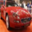

In [5]:
dl = CIFAR10DataLoader(hp.bs)
dis = Discriminator()

In [6]:
batch = next(iter(dl))['image']

In [28]:
randint(0,9)

8